<a href="https://colab.research.google.com/github/roycanchica79/skills-introduction-to-github/blob/dependabot%2Fgithub_actions%2Factions%2Fcheckout-4/Dise%C3%B1o_y_Experimento%2CEstad%C3%ADsticas_No_Param%C3%A9tricas(ROY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Cargar el archivo CSV

In [ ]:
data = pd.read_csv('Marketing_Data.csv')

# Diseño y Experimento
Implementación de un diseño experimental simple.
Asumiendo que 'Region' es el factor y 'TV' es la variable respuesta
Ejemplo de un diseño completamente aleatorizado

In [ ]:
model = ols('TV ~ C(Region)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df         F    PR(>F)
C(Region)  8.939136e+03    3.0  0.099691  0.960103
Residual   5.858337e+06  196.0       NaN       NaN



 Gráfico de residuales para el modelo ANOVA

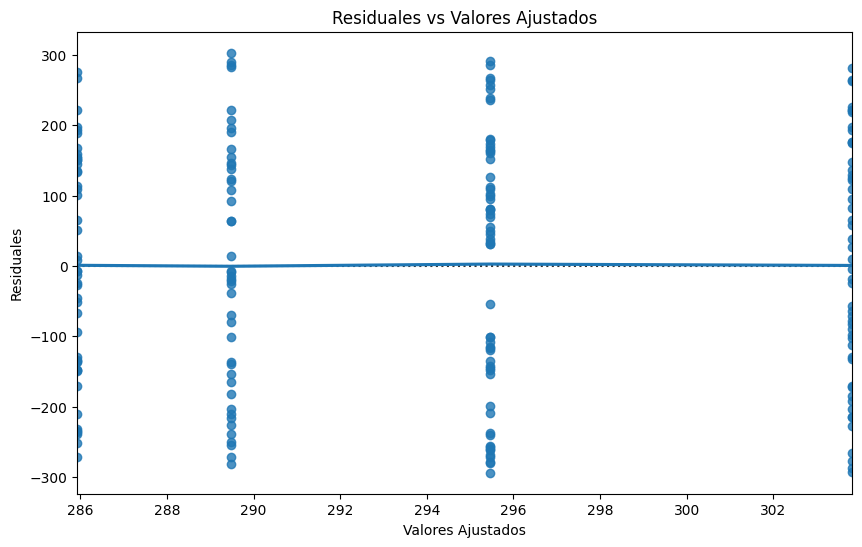

In [ ]:
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuales vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.show()

 # Estadísticas No Paramétricas
 Prueba de Kruskal-Wallis para comparar TV entre regiones.

In [ ]:
kruskal_result = stats.kruskal(
    data[data['Region'] == 'Central']['TV'],
    data[data['Region'] == 'South']['TV'],
    data[data['Region'] == 'East']['TV'],
    data[data['Region'] == 'West']['TV']
)

print(f"Kruskal-Wallis result: H={kruskal_result.statistic}, p-value={kruskal_result.pvalue}")











Kruskal-Wallis result: H=0.29319499913949754, p-value=0.9613031952579014


 Gráfico de caja para visualizar la comparación

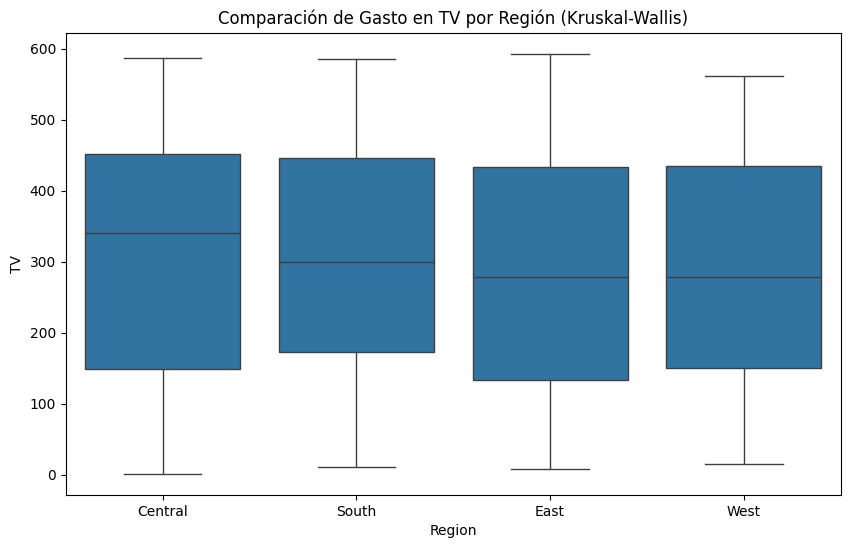

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TV', data=data)
plt.title('Comparación de Gasto en TV por Región (Kruskal-Wallis)')
plt.show()